In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gpiosenka_musical_instruments_image_classification_path = kagglehub.dataset_download('gpiosenka/musical-instruments-image-classification')

print('Data source import complete.')
print('Data source path:', gpiosenka_musical_instruments_image_classification_path)


c:\Users\Nouran\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.
Data source path: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1


In [2]:
print(f"The dataset has been downloaded to: {gpiosenka_musical_instruments_image_classification_path}")

# Optionally, you can also check the directory structure
import os
print("Files in the dataset directory:")
print(os.listdir(gpiosenka_musical_instruments_image_classification_path))

The dataset has been downloaded to: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1
Files in the dataset directory:
['6 test samples', 'class_dict.csv', 'EfficientNetB3-instruments-99.33.h5', 'instruments.csv', 'test', 'train', 'valid']


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Basic imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import cv2
import random
from keras.utils import img_to_array, load_img
from keras.models import Sequential  # Fixed typo: 'Sequentials' → 'Sequential'
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,GlobalAveragePooling2D  # Fixed typo: 'flatten' → 'Flatten'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Fixed typo: 'Earlystopping' → 'EarlyStopping'
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Adjusting paths to the dataset after downloading it from Kaggle
train_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train"
test_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test"


# Verify the paths
import os
print(f"Train Path: {train_path}")
print(f"Test Path: {test_path}")

# Check if directories exist
print("Train directory exists:", os.path.exists(train_path))
print("Test directory exists:", os.path.exists(test_path))


Train Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train
Test Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test
Train directory exists: True
Test directory exists: True


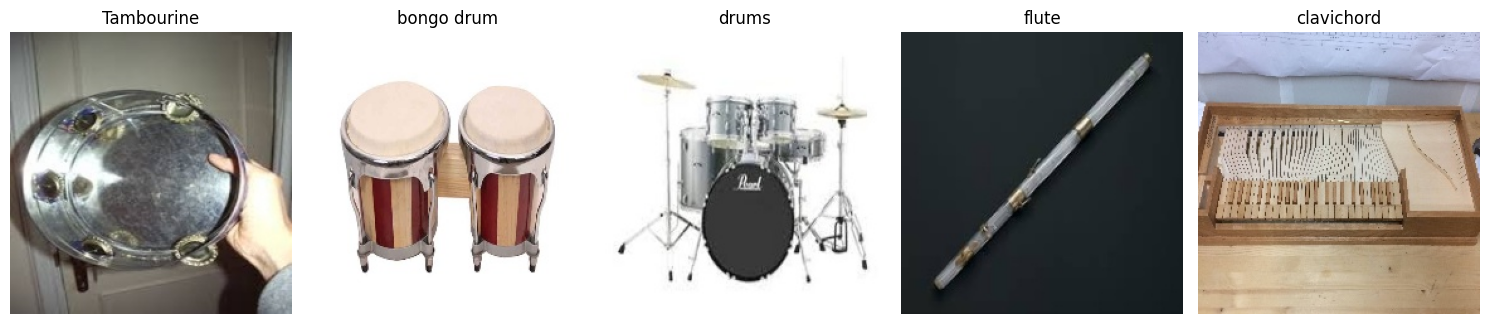

In [5]:
from tensorflow.keras.utils import load_img
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img

class_folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

# Pick 5 random classes (or all if less than 5)
random_classes = random.sample(class_folders, min(5, len(class_folders)))

# Plot settings
plt.figure(figsize=(15, 5))

for idx, class_name in enumerate(random_classes):
    class_path = os.path.join(train_path, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)
        img = load_img(img_path)

        plt.subplot(1, 5, idx + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Check the number of classes in the dataset
num_classes = len(class_folders)

In [7]:
# Check the number of images in each class
class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}

In [8]:
# Plot the class distribution
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Class Names')

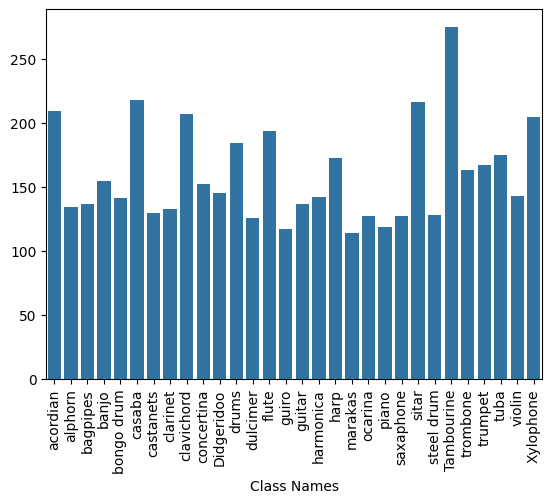

In [9]:
# Plotting the class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Class Names')

In [10]:
# Check the number of images in the training and test directories
train_images = len(os.listdir(train_path))
test_images = len(os.listdir(test_path))
print(f"Number of training images: {train_images}")
print(f"Number of test images: {test_images}")


Number of training images: 30
Number of test images: 30


In [11]:
# Check the number of images in each class in the training set
train_class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}
print("Number of images in each class in the training set:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")
# Check the number of images in each class in the test set
test_class_counts = {folder: len(os.listdir(os.path.join(test_path, folder))) for folder in class_folders}
print("Number of images in each class in the test set:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")
# Set image dimensions
img_width, img_height = 150, 150

Number of images in each class in the training set:
acordian: 209 images
alphorn: 134 images
bagpipes: 137 images
banjo: 155 images
bongo drum: 141 images
casaba: 218 images
castanets: 130 images
clarinet: 133 images
clavichord: 207 images
concertina: 152 images
Didgeridoo: 145 images
drums: 184 images
dulcimer: 126 images
flute: 194 images
guiro: 117 images
guitar: 137 images
harmonica: 142 images
harp: 173 images
marakas: 114 images
ocarina: 127 images
piano: 119 images
saxaphone: 127 images
sitar: 216 images
steel drum: 128 images
Tambourine: 275 images
trombone: 163 images
trumpet: 167 images
tuba: 175 images
violin: 143 images
Xylophone: 205 images
Number of images in each class in the test set:
acordian: 5 images
alphorn: 5 images
bagpipes: 5 images
banjo: 5 images
bongo drum: 5 images
casaba: 5 images
castanets: 5 images
clarinet: 5 images
clavichord: 5 images
concertina: 5 images
Didgeridoo: 5 images
drums: 5 images
dulcimer: 5 images
flute: 5 images
guiro: 5 images
guitar: 5 i

In [12]:
#Parameters
input_shape = (224, 224, 3)
BatchSize = 64
seed = 42
num_classes = 30

In [13]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [14]:
# Data Generator for Training Data
train_generator = train_datagen.flow_from_directory(train_path,
                                                      target_size=input_shape[:2],
                                                      batch_size=BatchSize,
                                                      class_mode='categorical',
                                                      seed=seed)

Found 4793 images belonging to 30 classes.


In [15]:
# Data Generator for Validation Data
validation_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Data Generator for Validation Data
validation_generator = validation_datagen.flow_from_directory(test_path,
                                                                target_size=input_shape[:2],
                                                                batch_size=BatchSize,
                                                                class_mode='categorical',
                                                                seed=seed)

Found 150 images belonging to 30 classes.


In [17]:
# Check the class indices
class_indices = train_generator.class_indices

In [18]:
# Check the class indices
print("Class Indices:")
print(class_indices)

Class Indices:
{'Didgeridoo': 0, 'Tambourine': 1, 'Xylophone': 2, 'acordian': 3, 'alphorn': 4, 'bagpipes': 5, 'banjo': 6, 'bongo drum': 7, 'casaba': 8, 'castanets': 9, 'clarinet': 10, 'clavichord': 11, 'concertina': 12, 'drums': 13, 'dulcimer': 14, 'flute': 15, 'guiro': 16, 'guitar': 17, 'harmonica': 18, 'harp': 19, 'marakas': 20, 'ocarina': 21, 'piano': 22, 'saxaphone': 23, 'sitar': 24, 'steel drum': 25, 'trombone': 26, 'trumpet': 27, 'tuba': 28, 'violin': 29}


In [19]:
# Check the number of classes
num_classes = len(class_indices)
print("Number of Classes:")
print(num_classes)


Number of Classes:
30


In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Freeze the base model

# Add custom layers on top of the pre-trained model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,992,734 (57.19 MB)

 Trainable params: 278,046 (1.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [23]:
# Define the checkpoint callback to save the best model
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=50,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1373 - loss: 3.2231
Epoch 1: val_accuracy improved from -inf to 0.59333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.1387 - loss: 3.2188 - val_accuracy: 0.5933 - val_loss: 1.9027 - learning_rate: 0.0010
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4745 - loss: 2.0955
Epoch 2: val_accuracy improved from 0.59333 to 0.78667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 370s 5s/step - accuracy: 0.4750 - loss: 2.0934 - val_accuracy: 0.7867 - val_loss: 1.0993 - learning_rate: 0.0010
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6130 - loss: 1.5077
Epoch 3: val_accuracy improved from 0.78667 to 0.84667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 388s 5s/step - accuracy: 0.6130 - loss: 1.5073 - val_accuracy: 0.8467 - val_loss: 0.7681 - learning_rate: 0.0010
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6596 - loss: 1.2705
Epoch 4: val_accuracy improved from 0.84667 to 0.88000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 345s 5s/step - accuracy: 0.6597 - loss: 1.2699 - val_accuracy: 0.8800 - val_loss: 0.5345 - learning_rate: 0.0010
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6962 - loss: 1.0910
Epoch 5: val_accuracy did not improve from 0.88000
75/75 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.6963 - loss: 1.0909 - val_accuracy: 0.8667 - val_loss: 0.4872 - learning_rate: 0.0010
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7264 - loss: 0.9885
Epoch 6: val_accuracy did not improve from 0.88000
75/75 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.7264 - loss: 0.9883 - val_accuracy: 0.8800 - val_loss: 0.4024 - learning_rate: 0.0010
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7341 - loss: 0.9372
Epoch 7: val_accuracy improved from 0.88000 to 0.89333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.7343 - loss: 0.9369 - val_accuracy: 0.8933 - val_loss: 0.3746 - learning_rate: 0.0010
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7547 - loss: 0.8551
Epoch 8: val_accuracy improved from 0.89333 to 0.90667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.7549 - loss: 0.8548 - val_accuracy: 0.9067 - val_loss: 0.3267 - learning_rate: 0.0010
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7700 - loss: 0.7901
Epoch 9: val_accuracy did not improve from 0.90667
75/75 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.7700 - loss: 0.7902 - val_accuracy: 0.8867 - val_loss: 0.3278 - learning_rate: 0.0010
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7892 - loss: 0.7314
Epoch 10: val_accuracy did not improve from 0.90667
75/75 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.7891 - loss: 0.7316 - val_accuracy: 0.8867 - val_loss: 0.2972 - learning_rate: 0.0010
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7945 - loss: 0.7048
Epoch 11: val_accuracy did not improve from 0.90667
75/75 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.7946 - loss: 0.7047 - val_accuracy: 0.8933 - val_loss: 0.2844 - learning_rate: 0.0010
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━

75/75 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.8110 - loss: 0.6386 - val_accuracy: 0.9133 - val_loss: 0.2528 - learning_rate: 0.0010
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8281 - loss: 0.5976
Epoch 15: val_accuracy improved from 0.91333 to 0.94000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8280 - loss: 0.5977 - val_accuracy: 0.9400 - val_loss: 0.2165 - learning_rate: 0.0010
Epoch 16/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8260 - loss: 0.5857
Epoch 16: val_accuracy did not improve from 0.94000
75/75 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.8260 - loss: 0.5859 - val_accuracy: 0.9067 - val_loss: 0.2309 - learning_rate: 0.0010
Epoch 17/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8152 - loss: 0.6022
Epoch 17: val_accuracy did not improve from 0.94000
75/75 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.8153 - loss: 0.6021 - val_accuracy: 0.9333 - val_loss: 0.2496 - learning_rate: 0.0010
Epoch 18/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8300 - loss: 0.5567
Epoch 18: val_accuracy did not improve from 0.94000
75/75 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.8300 - loss: 0.5567 - val_accuracy: 0.9067 - val_loss: 0.2209 - learning_rate: 0.0010
Epoch 19/50
75/75 ━━━━━━━━━━━━━━

75/75 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.8471 - loss: 0.5140 - val_accuracy: 0.9467 - val_loss: 0.1921 - learning_rate: 5.0000e-04
Epoch 21/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8405 - loss: 0.5188
Epoch 21: val_accuracy did not improve from 0.94667
75/75 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.8407 - loss: 0.5185 - val_accuracy: 0.9133 - val_loss: 0.1922 - learning_rate: 5.0000e-04
Epoch 22/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8357 - loss: 0.5171
Epoch 22: val_accuracy did not improve from 0.94667
75/75 ━━━━━━━━━━━━━━━━━━━━ 694s 9s/step - accuracy: 0.8359 - loss: 0.5168 - val_accuracy: 0.9133 - val_loss: 0.1968 - learning_rate: 5.0000e-04
Epoch 23/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8443 - loss: 0.5098
Epoch 23: val_accuracy did not improve from 0.94667
75/75 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.8444 - loss: 0.5095 - val_accuracy: 0.9467 - val_loss: 0.1776 - learning_rate: 5.0000e-04
Epoch 24/50
75/7

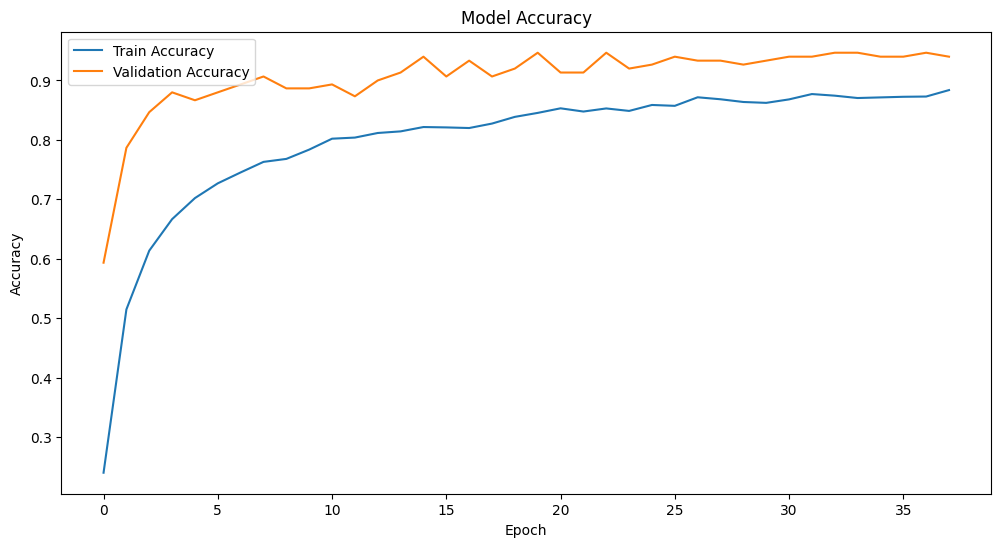

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


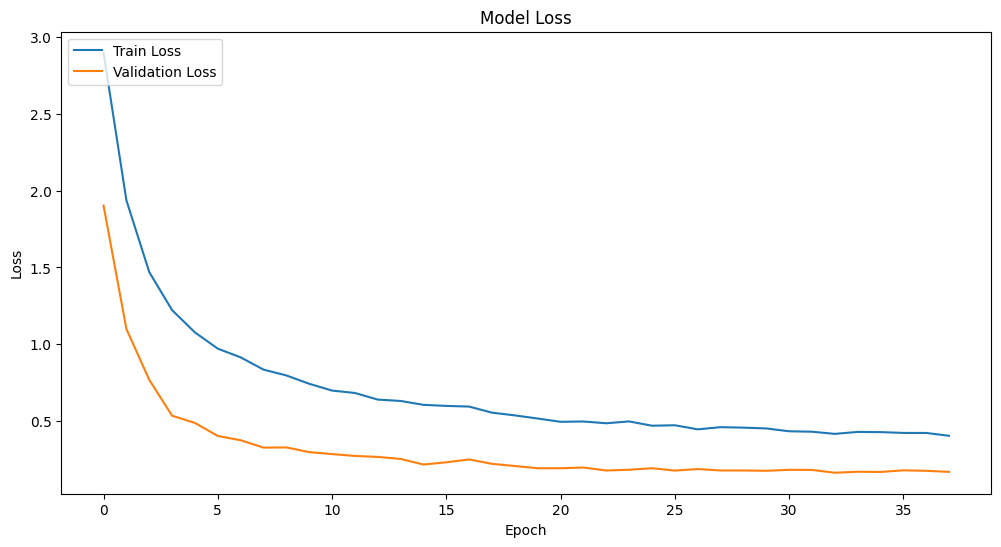

In [25]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [26]:
# Load the best model
from keras.models import load_model
best_model = load_model(checkpoint_path)
# Evaluate the model on the validation set
validation_loss, validation_accuracy = best_model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")
# Make predictions on the validation set
predictions = best_model.predict(validation_generator, verbose=1)
# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)
# Get the true class indices
true_classes = validation_generator.classes
# Get the class labels
class_labels = list(validation_generator.class_indices.keys())



3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9440 - loss: 0.1968
Validation Loss: 0.1921231597661972
Validation Accuracy: 0.9466666579246521
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


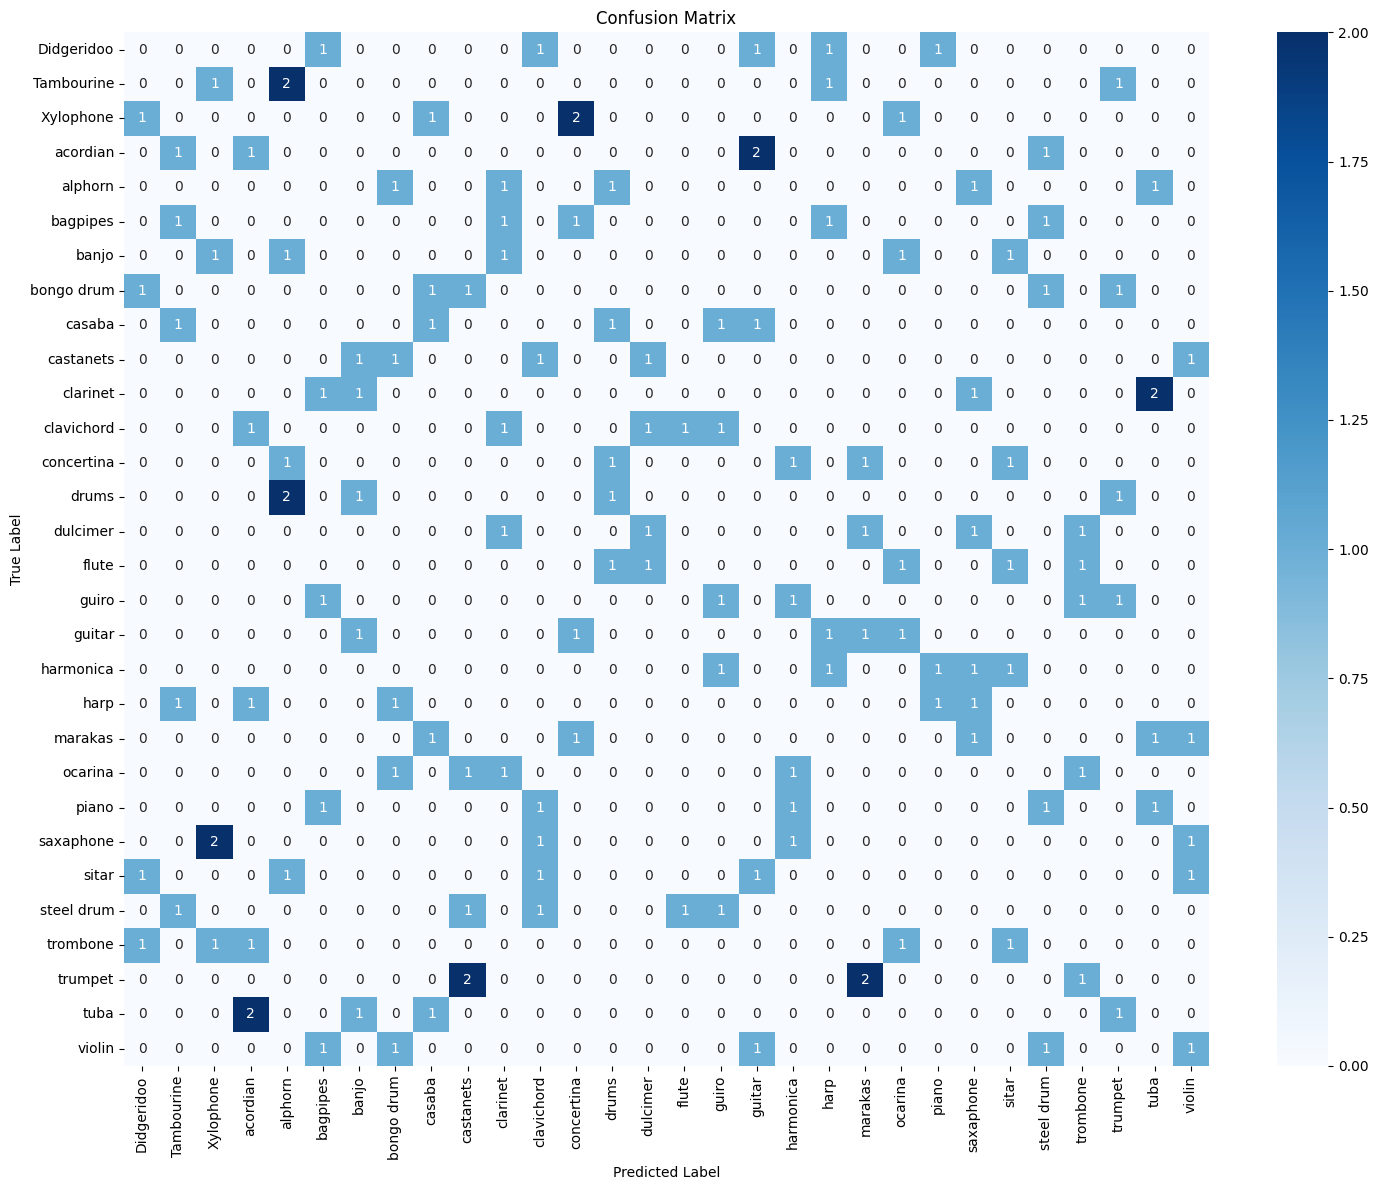

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix

# ---------------------- Confusion Matrix ----------------------
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
# Save the model
model.save("musical_instruments_model.h5")